In [1]:
import os
import joblib

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Article


In [2]:
data_folder = os.path.join(os.path.abspath(""), os.pardir, "RAW", "result_generation")
num_arotor_replication_configs = 48
arotor_replication_classes = ["Healthy", "Pitting", "Wear", "Micropitting", "TFF"]

sns.set_context("poster", font_scale=0.9)
plt.rcParams["svg.fonttype"] = "none"

Mean accuracy: 91.15451388888891
Mean accuracy 2: 91.1545138888889


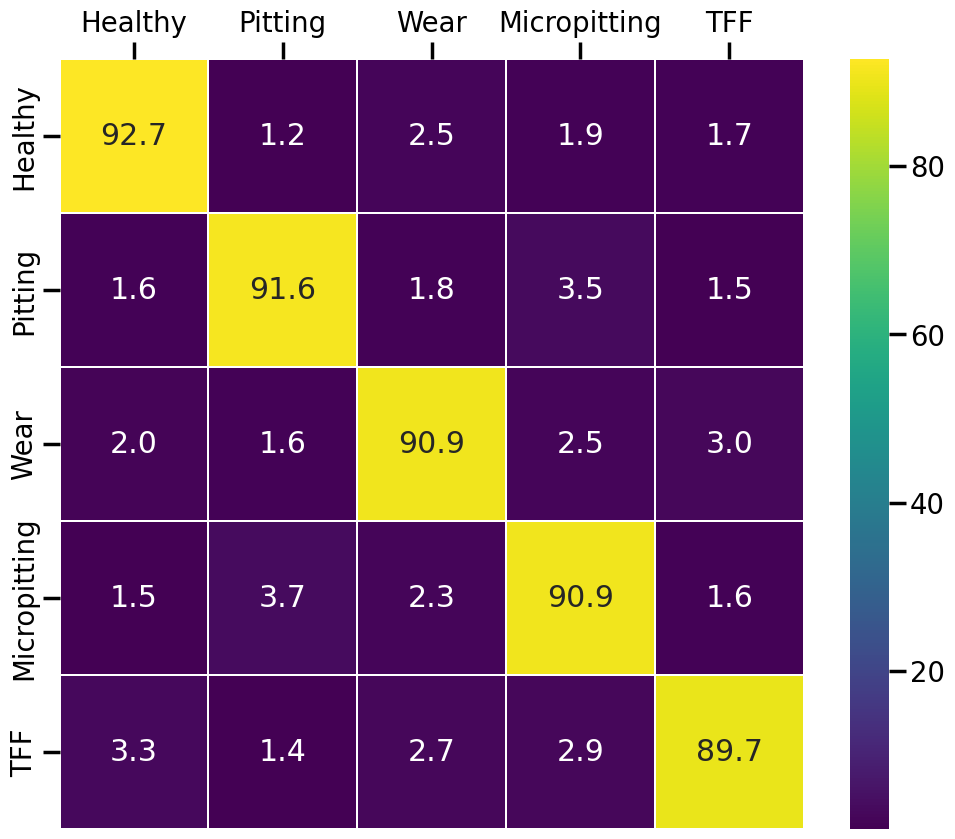

In [3]:
all_results = []
for i in range(num_arotor_replication_configs):
    all_results.append(
        joblib.load(
            os.path.join(
                data_folder,
                "arotor_replication_torque1_article_100",
                f"results_for_config_{i}.pkl",
            )
        )
    )

#! Do not use the "accuracy" from .pkl. It is the accuracy of the first non-ensemble model
all_diags = []
for r in all_results:
    all_diags.append(np.array([np.diag(x) / x[0].sum() for x in r["ensemble_cfs"]]))
print("Mean accuracy:", np.array(all_diags).mean(1).mean(0).mean() * 100)

all_cfs = []
for i in range(num_arotor_replication_configs):
    cfs = np.array(all_results[i]["ensemble_cfs"])
    cfs = cfs.sum(axis=0)
    cfs = cfs / cfs.sum(axis=1)
    all_cfs.append(cfs)
    # all_cfs.append(cfs.mean(axis=0) / (cfs[0].sum() / len(arotor_replication_classes))) # Alternative way

cf_agg = np.array(all_cfs).mean(axis=0) * 100
print("Mean accuracy 2:", np.diag(cf_agg).mean())

fig, ax = plt.subplots(figsize=(12, 10))
g = sns.heatmap(
    cf_agg,
    annot=True,
    fmt=".1f",
    linewidth=0.3,
    xticklabels=arotor_replication_classes,
    yticklabels=arotor_replication_classes,
    cmap="viridis",
)

ax.xaxis.set_ticks_position("top")
ax.xaxis.set_label_position("top")
plt.savefig("images/C_AGFD_T1_CF.svg")

Mean accuracy: 98.12810185185185
Mean accuracy 2: 98.12810185185185


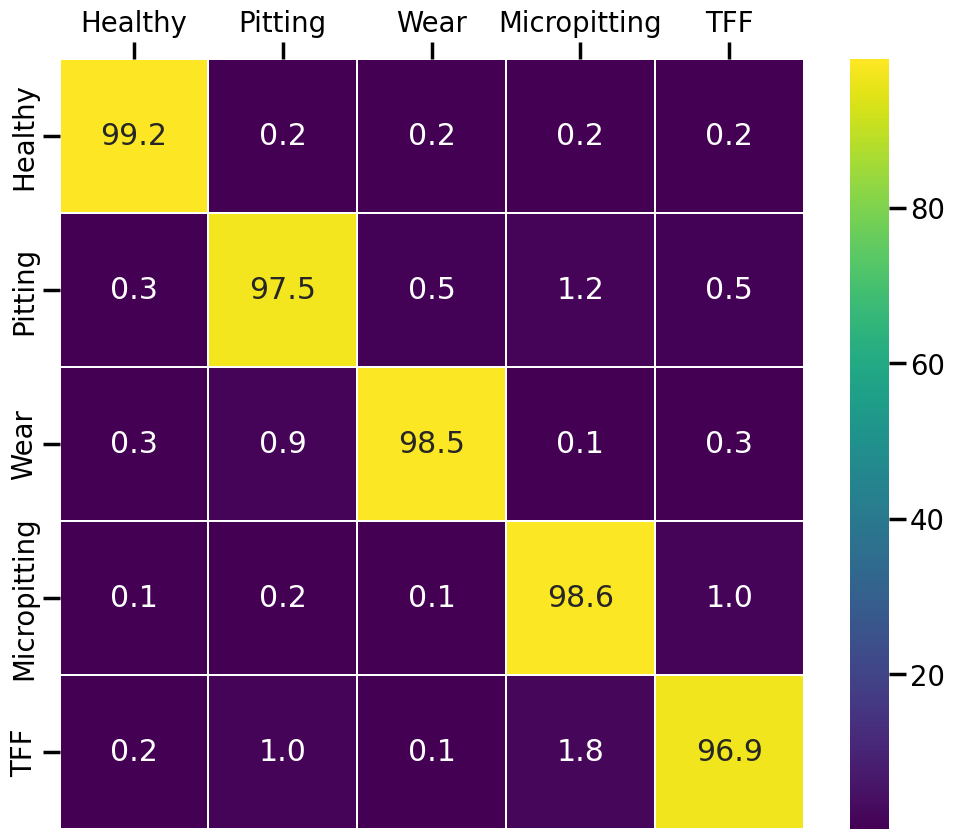

In [4]:
all_results = []
for i in range(num_arotor_replication_configs):
    all_results.append(
        joblib.load(
            os.path.join(
                data_folder,
                "arotor_replication_acc3_article_100",
                f"results_for_config_{i}.pkl",
            )
        )
    )

#! Do not use the "accuracy" from .pkl. It is the accuracy of the first non-ensemble model
all_diags = []
for r in all_results:
    all_diags.append(np.array([np.diag(x) / x[0].sum() for x in r["ensemble_cfs"]]))
print("Mean accuracy:", np.array(all_diags).mean(1).mean(0).mean() * 100)

all_cfs = []
for i in range(num_arotor_replication_configs):
    cfs = np.array(all_results[i]["ensemble_cfs"])
    cfs = cfs.sum(axis=0)
    cfs = cfs / cfs.sum(axis=1)
    all_cfs.append(cfs)
    # all_cfs.append(cfs.mean(axis=0) / (cfs[0].sum() / len(arotor_replication_classes))) # Alternative way

cf_agg = np.array(all_cfs).mean(axis=0) * 100
print("Mean accuracy 2:", np.diag(cf_agg).mean())

fig, ax = plt.subplots(figsize=(12, 10))
g = sns.heatmap(
    cf_agg,
    annot=True,
    fmt=".1f",
    linewidth=0.3,
    xticklabels=arotor_replication_classes,
    yticklabels=arotor_replication_classes,
    cmap="viridis",
)

ax.xaxis.set_ticks_position("top")
ax.xaxis.set_label_position("top")
plt.savefig("images/C_AGFD_A3_CF.svg")

---
---

---

# OLD


# ARotor replication mixed (robust, k=5)

Config 59 dropped during generation, copied from 58 currently


In [4]:
data_folder = os.path.join(os.path.abspath(""), os.pardir, os.pardir, "reports", "RAW", "result_generation")

all_results = []
for i in range(96):
    with open(
        os.path.join(
            data_folder,
            "arotor_replication_mixed-robust_k5",
            f"results_for_config_{i}.pkl",
        ),
        "rb",
    ) as f:
        all_results.append(joblib.load(f))

all_results[0]

{'accuracies': [0.2683333333333333, 0.26211111111111113, 0.23944444444444443],
 'cfs': [array([[1347,  147,  165,   81,   60],
         [ 784,  220,  210,  404,  182],
         [ 173,   42,  320,  396,  869],
         [ 275,  389, 1109,    0,   27],
         [ 147,  160,  964,    1,  528]]),
  array([[1206,  319,   72,  164,   39],
         [ 871,  473,   25,  325,  106],
         [ 286,  210,  191,  341,  772],
         [ 380,  642,  772,    4,    2],
         [ 184,  304,  822,    5,  485]]),
  array([[1229,  291,   61,  147,   72],
         [ 736,  362,    7,  461,  234],
         [ 224,  197,   70,  429,  880],
         [ 284,  490, 1016,    0,   10],
         [ 179,  209,  893,   25,  494]])],
 'ensemble_cfs': [array([[1800,    0,    0,    0,    0],
         [  76, 1724,    0,    0,    0],
         [   0,  584,   28, 1188,    0],
         [   0, 1800,    0,    0,    0],
         [   0,  263, 1537,    0,    0]]),
  array([[1623,  177,    0,    0,    0],
         [1800,    0,    0, 

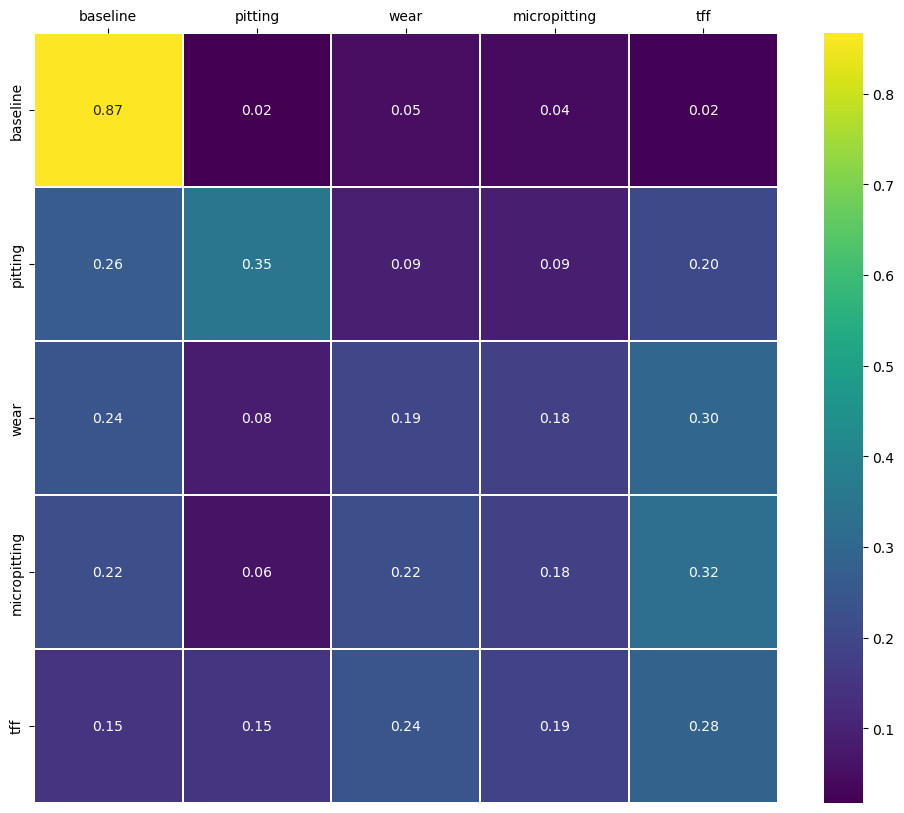

In [5]:
categories = ["baseline", "pitting", "wear", "micropitting", "tff"]

all_cfs = []
for i in range(96):
    cfs = np.array(all_results[i]["ensemble_cfs"])
    all_cfs.append(cfs.mean(axis=0) / (cfs[0].sum() / 5))

cf_agg = np.array(all_cfs).mean(axis=0)

f, ax = plt.subplots(figsize=(12, 10))

g = sns.heatmap(
    cf_agg,
    annot=True,
    fmt=".2f",
    linewidth=0.3,
    xticklabels=categories,
    yticklabels=categories,
    cmap="viridis",
)

ax.xaxis.set_ticks_position("top")
ax.xaxis.set_label_position("top")

# ARotor replication mixed (robust, smooth, k=5)


In [7]:
data_folder = os.path.join(os.path.abspath(""), os.pardir, os.pardir, "reports", "RAW", "result_generation")

all_results = []
for i in range(96):
    with open(
        os.path.join(
            data_folder,
            "arotor_replication_mixed-robust_smooth_k5",
            f"results_for_config_{i}.pkl",
        ),
        "rb",
    ) as f:
        all_results.append(joblib.load(f))

all_results[0]

{'accuracies': [0.3438888888888889, 0.294, 0.31655555555555553],
 'cfs': [array([[1703,   37,   28,   14,   18],
         [ 744,  331,   13,  575,  137],
         [ 152,  389,    0,  490,  769],
         [ 110,  427,  677,    2,  584],
         [ 242,   21,  106,  372, 1059]]),
  array([[1747,   50,    0,    3,    0],
         [ 829,  342,   72,  391,  166],
         [ 214,  422,   94,  500,  570],
         [  32,  514, 1031,    0,  223],
         [ 241,   12,  710,  374,  463]]),
  array([[1777,    0,    3,    2,   18],
         [ 770,  540,   83,  322,   85],
         [ 419,   54,  382,  749,  196],
         [  52,  601, 1147,    0,    0],
         [ 309,  437,  903,    1,  150]])],
 'ensemble_cfs': [array([[1800,    0,    0,    0,    0],
         [ 261, 1539,    0,    0,    0],
         [   0, 1759,    0,   41,    0],
         [   0, 1792,    0,    8,    0],
         [   0,   11,   67, 1722,    0]]),
  array([[1800,    0,    0,    0,    0],
         [1800,    0,    0,    0,    0],
 

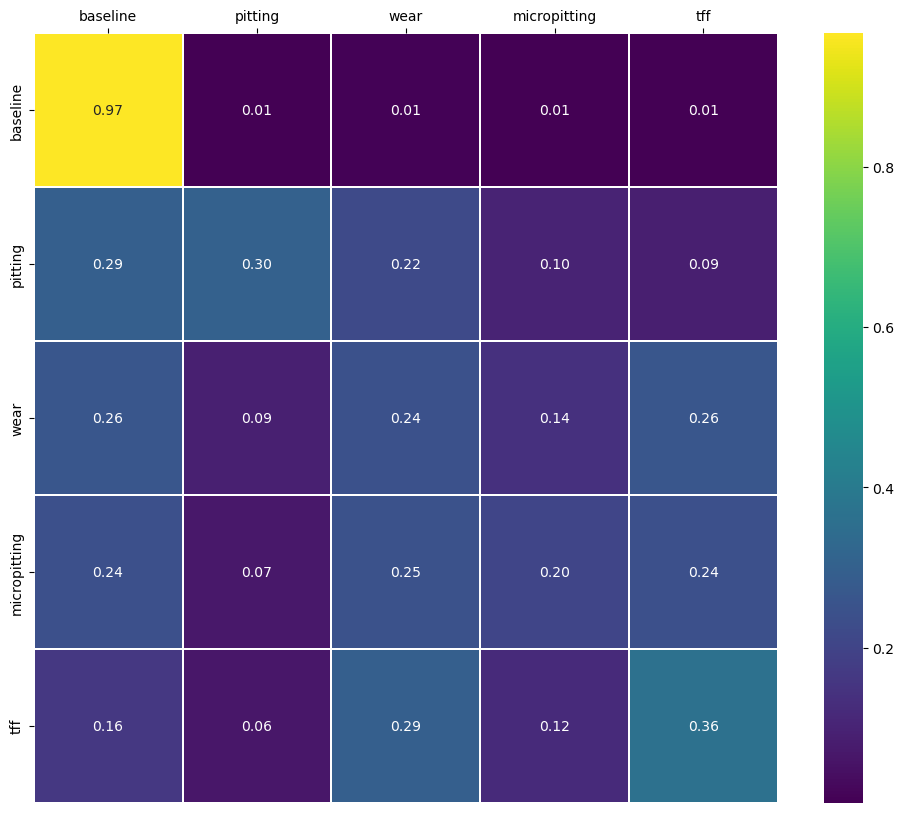

In [8]:
categories = ["baseline", "pitting", "wear", "micropitting", "tff"]

all_cfs = []
for i in range(96):
    cfs = np.array(all_results[i]["ensemble_cfs"])
    all_cfs.append(cfs.mean(axis=0) / (cfs[0].sum() / 5))

cf_agg = np.array(all_cfs).mean(axis=0)

f, ax = plt.subplots(figsize=(12, 10))

g = sns.heatmap(
    cf_agg,
    annot=True,
    fmt=".2f",
    linewidth=0.3,
    xticklabels=categories,
    yticklabels=categories,
    cmap="viridis",
)

ax.xaxis.set_ticks_position("top")
ax.xaxis.set_label_position("top")

# ARotor replication mixed (robust, smooth)


In [5]:
data_folder = os.path.join(os.path.abspath(""), os.pardir, os.pardir, "reports", "RAW", "result_generation")

all_results = []
for i in range(96):
    with open(
        os.path.join(
            data_folder,
            "arotor_replication_mixed-robust_smooth",
            f"results_for_config_{i}.pkl",
        ),
        "rb",
    ) as f:
        all_results.append(joblib.load(f))

all_results[0]

{'accuracies': [0.31044444444444447, 0.3085555555555556, 0.39511111111111114],
 'cfs': [array([[1508,  158,   67,   39,   28],
         [ 719,  376,  108,  519,   78],
         [ 115,  382,   40,  551,  712],
         [ 121,  511,  561,   19,  588],
         [  40,   49,  557,  303,  851]]),
  array([[1516,  110,   40,   76,   58],
         [ 737,  369,   50,  531,  113],
         [  81,  276,   47,  799,  597],
         [  50,  409,  884,   13,  444],
         [  53,   92,  440,  383,  832]]),
  array([[1153,  255,  153,  158,   81],
         [ 530,  350,  397,  376,  147],
         [ 401,  354,  323,  525,  197],
         [ 270,  263,  425,  682,  160],
         [ 103,   72,  321,  256, 1048]])],
 'ensemble_cfs': [array([[1057,  442,   68,  233,    0],
         [ 365,  303,  591,  527,   14],
         [   1,   11,   34,  903,  851],
         [   5,    5,   95, 1448,  247],
         [   0,    0,    0,    0, 1800]]),
  array([[1744,   11,   45,    0,    0],
         [  30,  293,  461, 

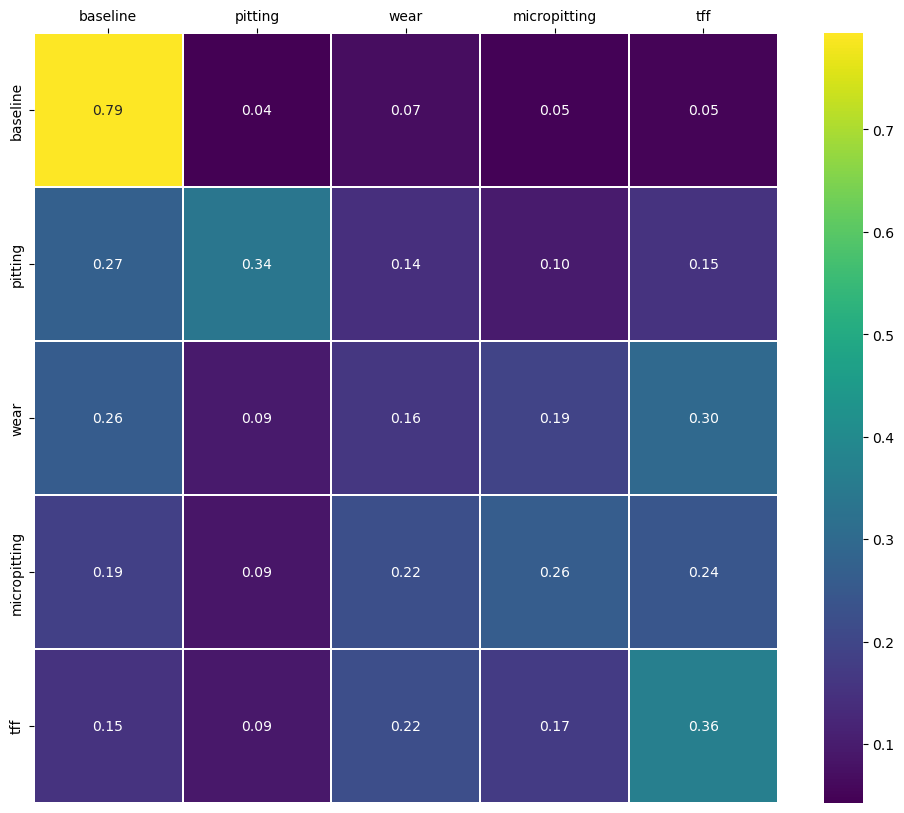

In [6]:
categories = ["baseline", "pitting", "wear", "micropitting", "tff"]

all_cfs = []
for i in range(96):
    cfs = np.array(all_results[i]["ensemble_cfs"])
    all_cfs.append(cfs.mean(axis=0) / (cfs[0].sum() / 5))

cf_agg = np.array(all_cfs).mean(axis=0)

f, ax = plt.subplots(figsize=(12, 10))

g = sns.heatmap(
    cf_agg,
    annot=True,
    fmt=".2f",
    linewidth=0.3,
    xticklabels=categories,
    yticklabels=categories,
    cmap="viridis",
)

ax.xaxis.set_ticks_position("top")
ax.xaxis.set_label_position("top")

# New ARotor replication (robust, smoothed)


In [3]:
data_folder = os.path.join(os.path.abspath(""), os.pardir, os.pardir, "reports", "RAW", "result_generation")

all_results = []
for i in range(96):
    with open(
        os.path.join(
            data_folder,
            "arotor_replication-robust_smooth",
            f"results_for_config_{i}.pkl",
        ),
        "rb",
    ) as f:
        all_results.append(joblib.load(f))

all_results[0]

{'accuracies': [0.7573333333333333, 0.8164444444444444, 0.7557777777777778],
 'cfs': [array([[1423,  100,  128,   66,   83],
         [ 136, 1511,  123,    8,   22],
         [  56,   91, 1251,  243,  159],
         [  57,   30,  127, 1344,  242],
         [  76,    9,  179,  249, 1287]]),
  array([[1528,   37,  167,   27,   41],
         [  46, 1562,  161,    1,   30],
         [  97,   76, 1420,  105,  102],
         [  46,   25,   82, 1387,  260],
         [  40,    5,  113,  191, 1451]]),
  array([[1518,   92,   89,   68,   33],
         [ 157, 1527,  101,    9,    6],
         [  95,  100, 1310,  203,   92],
         [  98,   63,  242, 1069,  328],
         [  83,   14,  190,  135, 1378]])],
 'ensemble_cfs': [array([[1800,    0,    0,    0,    0],
         [   0,  987,  629,    3,  181],
         [   0,  513,  815,   20,  452],
         [   0,    4,   14, 1592,  190],
         [   0,  159,  392,  225, 1024]]),
  array([[1236,  564,    0,    0,    0],
         [ 318, 1481,    0,   

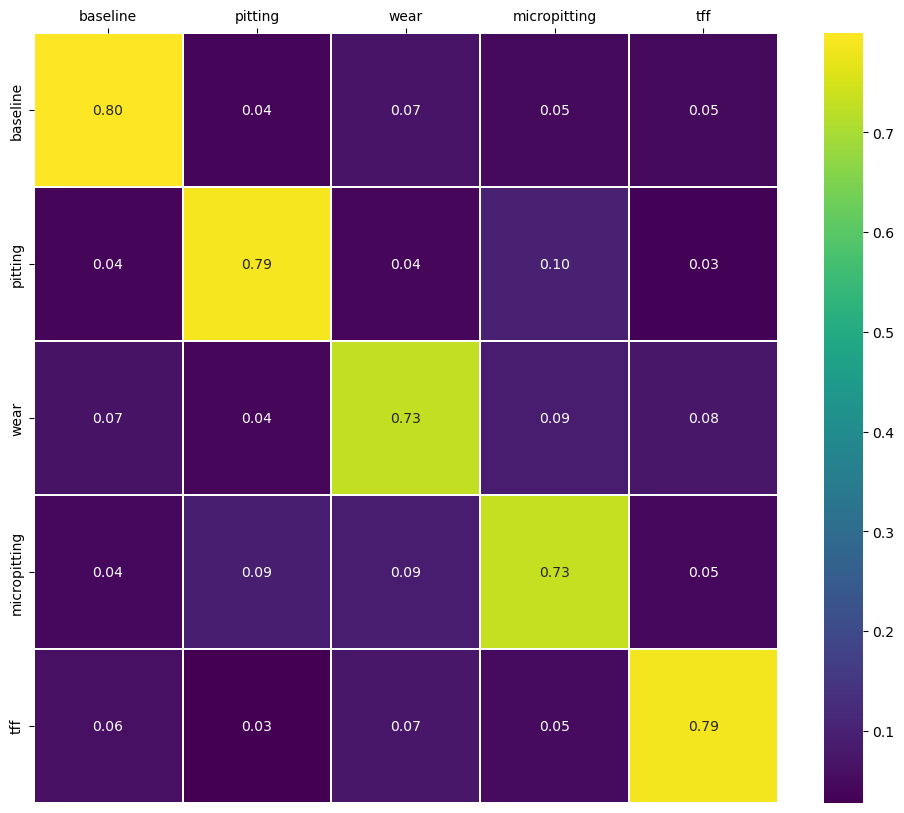

In [4]:
categories = ["baseline", "pitting", "wear", "micropitting", "tff"]

all_cfs = []
for i in range(96):
    cfs = np.array(all_results[i]["ensemble_cfs"])
    all_cfs.append(cfs.mean(axis=0) / (cfs[0].sum() / 5))

cf_agg = np.array(all_cfs).mean(axis=0)

f, ax = plt.subplots(figsize=(12, 10))

g = sns.heatmap(
    cf_agg,
    annot=True,
    fmt=".2f",
    linewidth=0.3,
    xticklabels=categories,
    yticklabels=categories,
    cmap="viridis",
)

ax.xaxis.set_ticks_position("top")
ax.xaxis.set_label_position("top")

# New ARotor replication (robust) [Article]


In [60]:
data_folder = os.path.join(os.path.abspath(""), os.pardir, os.pardir, "reports", "RAW", "result_generation")

all_results = []
for i in range(96):
    with open(
        os.path.join(
            data_folder,
            "arotor_replication-robust",
            f"results_for_config_{i}.pkl",
        ),
        "rb",
    ) as f:
        all_results.append(joblib.load(f))

all_results[0]

{'accuracies': [0.8757777777777778, 0.9123333333333333, 0.8862222222222222],
 'cfs': [array([[1538,   12,   90,   66,   94],
         [   2, 1553,   90,  152,    3],
         [  34,   81, 1510,  147,   28],
         [  14,   55,   21, 1570,  140],
         [   9,   11,   13,   56, 1711]]),
  array([[1717,   30,   24,   25,    4],
         [   7, 1728,   64,    0,    1],
         [  70,   52, 1631,   37,   10],
         [  74,   46,   70, 1523,   87],
         [  18,    2,   50,  118, 1612]]),
  array([[1561,   99,   51,   54,   35],
         [  29, 1743,   23,    0,    5],
         [  27,   13, 1499,  234,   27],
         [  36,    0,   70, 1535,  159],
         [   5,    5,   14,  138, 1638]])],
 'ensemble_cfs': [array([[1783,   17,    0,    0,    0],
         [  93, 1707,    0,    0,    0],
         [   0,    0, 1800,    0,    0],
         [   0,    0,    0, 1450,  350],
         [   0,    0,   38,  419, 1343]]),
  array([[1767,   33,    0,    0,    0],
         [   0, 1800,    0,   

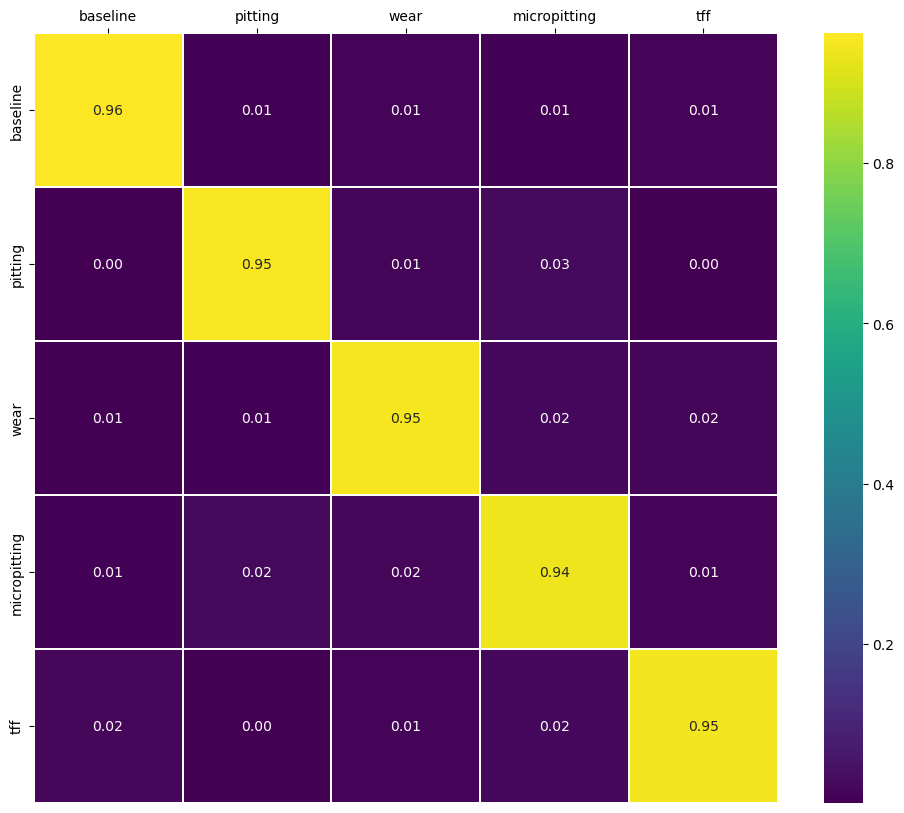

In [61]:
categories = ["baseline", "pitting", "wear", "micropitting", "tff"]

all_cfs = []
for i in range(96):
    cfs = np.array(all_results[i]["ensemble_cfs"])
    all_cfs.append(cfs.mean(axis=0) / (cfs[0].sum() / 5))

cf_agg = np.array(all_cfs).mean(axis=0)

f, ax = plt.subplots(figsize=(12, 10))

g = sns.heatmap(
    cf_agg,
    annot=True,
    fmt=".2f",
    linewidth=0.3,
    xticklabels=categories,
    yticklabels=categories,
    cmap="viridis",
)

ax.xaxis.set_ticks_position("top")
ax.xaxis.set_label_position("top")

# New ARotor replication


In [66]:
data_folder = os.path.join(os.path.abspath(""), os.pardir, os.pardir, "reports", "RAW", "result_generation")

all_results = []
for i in range(96):
    with open(
        os.path.join(data_folder, "arotor_replication", f"results_for_config_{i}.pkl"),
        "rb",
    ) as f:
        all_results.append(joblib.load(f))

all_results[0]

{'accuracies': [0.8948888888888888, 0.9033333333333333, 0.9022222222222223],
 'cfs': [array([[1661,  129,    6,    4,    0],
         [  13, 1743,   44,    0,    0],
         [  14,  109, 1568,  101,    8],
         [  48,    6,  272, 1414,   60],
         [  31,    0,   22,   79, 1668]]),
  array([[1617,   55,   83,   45,    0],
         [   4, 1668,  128,    0,    0],
         [  63,   59, 1600,   45,   33],
         [  85,   13,   14, 1615,   73],
         [  56,    0,   23,   91, 1630]]),
  array([[1596,  136,   40,   18,   10],
         [  41, 1663,   96,    0,    0],
         [  40,  128, 1601,   20,   11],
         [  35,   23,   17, 1645,   80],
         [  32,    0,   36,  117, 1615]])],
 'ensemble_cfs': [array([[1522,  278,    0,    0,    0],
         [   4, 1796,    0,    0,    0],
         [   0,    0, 1713,   87,    0],
         [   0,    0,    2, 1798,    0],
         [   0,    0,    0,    0, 1800]]),
  array([[1790,    1,    0,    9,    0],
         [   0, 1800,    0,   

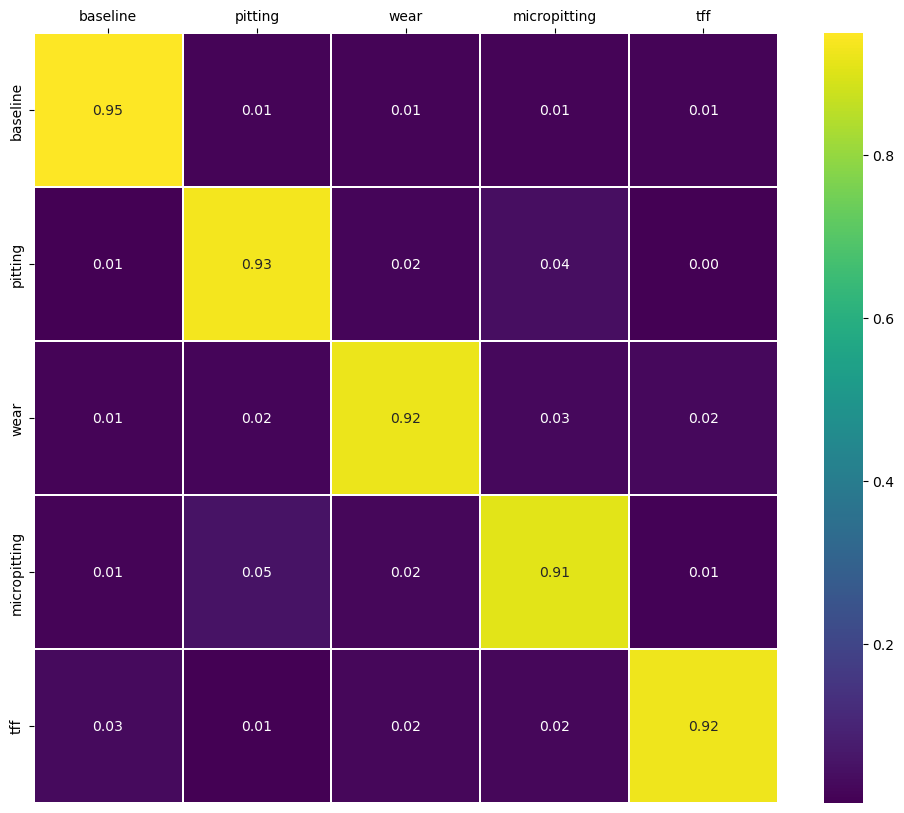

In [68]:
categories = ["baseline", "pitting", "wear", "micropitting", "tff"]

all_cfs = []
for i in range(96):
    cfs = np.array(all_results[i]["ensemble_cfs"])
    all_cfs.append(cfs.mean(axis=0) / (cfs[0].sum() / 5))

cf_agg = np.array(all_cfs).mean(axis=0)

f, ax = plt.subplots(figsize=(12, 10))

g = sns.heatmap(
    cf_agg,
    annot=True,
    fmt=".2f",
    linewidth=0.3,
    xticklabels=categories,
    yticklabels=categories,
    cmap="viridis",
)

ax.xaxis.set_ticks_position("top")
ax.xaxis.set_label_position("top")

---

# ARotor (old & replication) results (mixed and non-mixed)


## Mixed installations


In [52]:
data_folder = os.path.join(os.path.abspath(""), os.pardir, os.pardir, "reports", "RAW", "result_generation")

all_results = []
for i in range(48):
    with open(
        os.path.join(data_folder, "arotor_replication_mixed", f"results_for_config_{i}.pkl"),
        "rb",
    ) as f:
        all_results.append(joblib.load(f))

all_results[0]

{'accuracies': [0.28444444444444444,
  0.4600740740740741,
  0.3668148148148148,
  0.41655555555555557,
  0.3027037037037037,
  0.3373333333333333,
  0.43118518518518517,
  0.3535185185185185,
  0.3916296296296296,
  0.4560740740740741],
 'cfs': [array([[4441,   54,  105,  590,  210],
         [ 156, 1451,  888, 1096, 1809],
         [ 348, 1674,    6, 2522,  850],
         [ 306,  677, 1141, 1754, 1522],
         [ 687, 2224,  578, 1883,   28]]),
  array([[5217,   23,  130,    9,   21],
         [ 160, 4791,  336,   73,   40],
         [ 235, 1779,  102, 1826, 1458],
         [   0,  355, 1418, 1267, 2360],
         [  60,  123, 2112, 2060, 1045]]),
  array([[4894,  235,  167,   90,   14],
         [2003,  140, 2407,  564,  286],
         [ 433, 1648, 1192,  444, 1683],
         [ 208,  225,  914,  597, 3456],
         [  30,  324,  225, 1740, 3081]]),
  array([[5162,   50,  102,   67,   19],
         [ 672, 2316,  942,  239, 1231],
         [ 277, 1691,  341, 1540, 1551],
         [ 

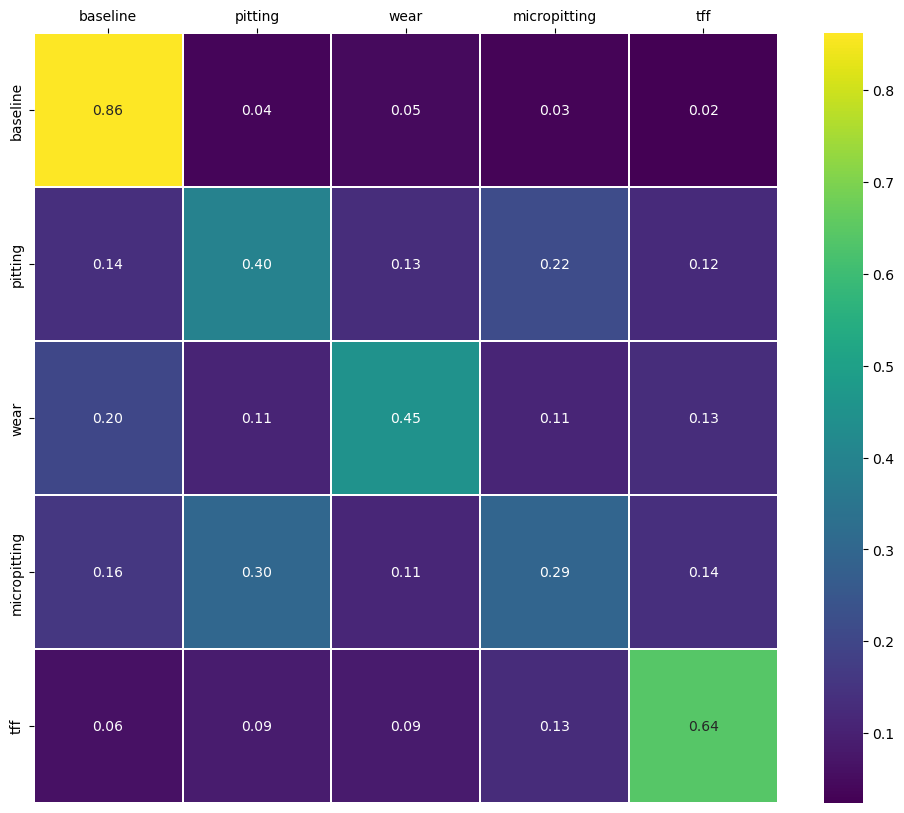

In [53]:
categories = ["baseline", "pitting", "wear", "micropitting", "tff"]

all_cfs = []
for i in range(48):
    cfs = np.array(all_results[i]["cfs"])
    all_cfs.append(cfs.mean(axis=0) / (cfs[0].sum() / 5))

cf_agg = np.array(all_cfs).mean(axis=0)

f, ax = plt.subplots(figsize=(12, 10))

g = sns.heatmap(
    cf_agg,
    annot=True,
    fmt=".2f",
    linewidth=0.3,
    xticklabels=categories,
    yticklabels=categories,
    cmap="viridis",
)

ax.xaxis.set_ticks_position("top")
ax.xaxis.set_label_position("top")

## Non-mixed


In [50]:
data_folder = os.path.join(os.path.abspath(""), os.pardir, os.pardir, "reports", "RAW", "result_generation")

all_results = []
for i in range(48):
    with open(
        os.path.join(data_folder, "arotor_replication", f"results_for_config_{i}.pkl"),
        "rb",
    ) as f:
        all_results.append(joblib.load(f))

all_results[0]

{'accuracies': [0.8571111111111112,
  0.543037037037037,
  0.8108518518518518,
  0.6334074074074074,
  0.5955555555555555,
  0.6573333333333333,
  0.7020740740740741,
  0.6049629629629629,
  0.8218148148148148,
  0.8723333333333333],
 'cfs': [array([[4918,   20,  124,  263,   75],
         [   5, 4641,   79,  673,    2],
         [  72,   74, 3954,  796,  504],
         [  62,  207,  317, 4792,   22],
         [ 184,    5,  361,   13, 4837]]),
  array([[3547,  653,  479,  299,  422],
         [ 533, 2992,  295,  558, 1022],
         [ 524,  614, 2555,  935,  772],
         [ 298,  739,  545, 2488, 1330],
         [ 224,  658,  458,  980, 3080]]),
  array([[4967,   27,   80,  195,  131],
         [  99, 4500,   77,   91,  633],
         [ 140,  338, 3991,  901,   30],
         [ 237,   73,  515, 4216,  359],
         [ 129,  587,   12,  453, 4219]]),
  array([[4763,  166,  295,   68,  108],
         [ 157, 3154,  569,  536,  984],
         [ 204,  855, 2774, 1329,  238],
         [  72,

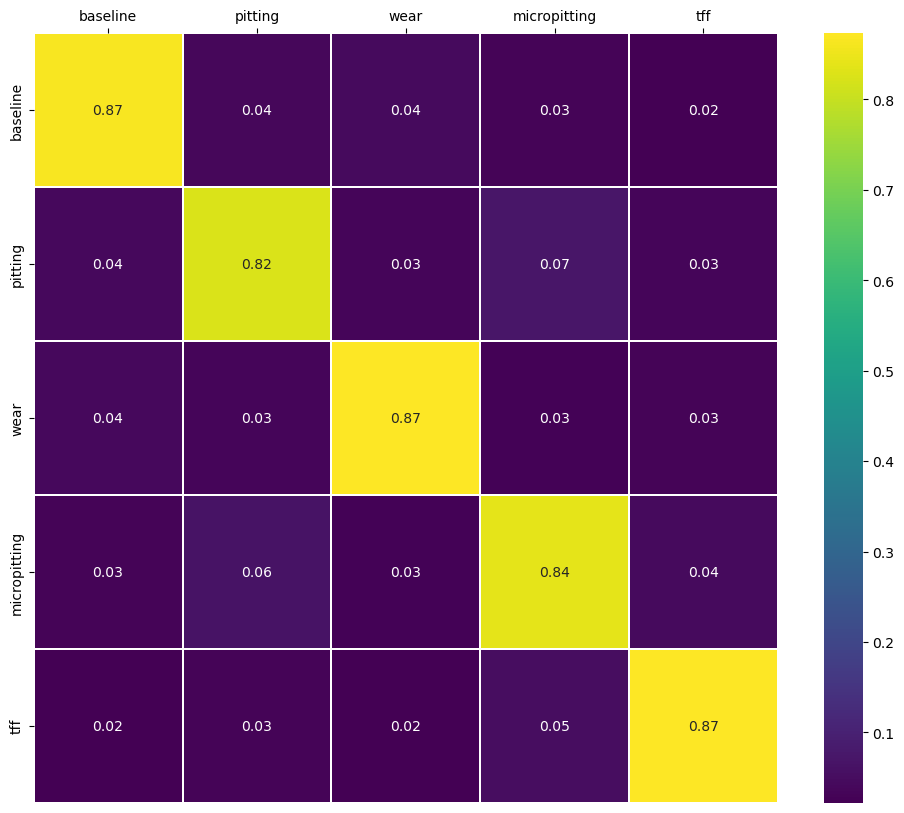

In [51]:
categories = ["baseline", "pitting", "wear", "micropitting", "tff"]

all_cfs = []
for i in range(48):
    cfs = np.array(all_results[i]["cfs"])
    all_cfs.append(cfs.mean(axis=0) / (cfs[0].sum() / 5))

cf_agg = np.array(all_cfs).mean(axis=0)

f, ax = plt.subplots(figsize=(12, 10))

g = sns.heatmap(
    cf_agg,
    annot=True,
    fmt=".2f",
    linewidth=0.3,
    xticklabels=categories,
    yticklabels=categories,
    cmap="viridis",
)

ax.xaxis.set_ticks_position("top")
ax.xaxis.set_label_position("top")

# ARotor


In [45]:
data_folder = os.path.join(os.path.abspath(""), os.pardir, os.pardir, "reports", "RAW", "result_generation")

all_results = []
for i in range(6):
    with open(os.path.join(data_folder, "arotor", f"results_for_config_{i}.pkl"), "rb") as f:
        all_results.append(joblib.load(f))

all_results[0]

{'accuracies': [0.7456666666666667,
  0.7533703703703704,
  0.7723703703703704,
  0.9168518518518518,
  0.8127592592592593,
  0.7976111111111112,
  0.8174444444444444,
  0.7884814814814814,
  0.8741481481481481,
  0.8564259259259259],
 'cfs': [array([[5261,    0,    0,    0,    0,  139,    0,    0,    0,    0],
         [   0, 3661, 1739,    0,    0,    0,    0,    0,    0,    0],
         [   0, 2762, 2638,    0,    0,    0,    0,    0,    0,    0],
         [   0,   28,   52, 5265,    4,    0,    0,    0,   51,    0],
         [   5,   54,  219,    0, 3506,  701,    0,  450,  465,    0],
         [ 296,   13,   65,    0, 1190, 3250,    0,  545,   41,    0],
         [   0,    0,    0,    0,    0,    1, 5041,   21,  268,   69],
         [   1,    0,    0,    0,  750,  457,  206, 3025,  961,    0],
         [   0,    0,    0,    1,  521,  196,   12, 1450, 3220,    0],
         [   0,    0,    0,    0,    0,    0,    1,    0,    0, 5399]]),
  array([[4417,    0,    0,    0,  552,  430, 

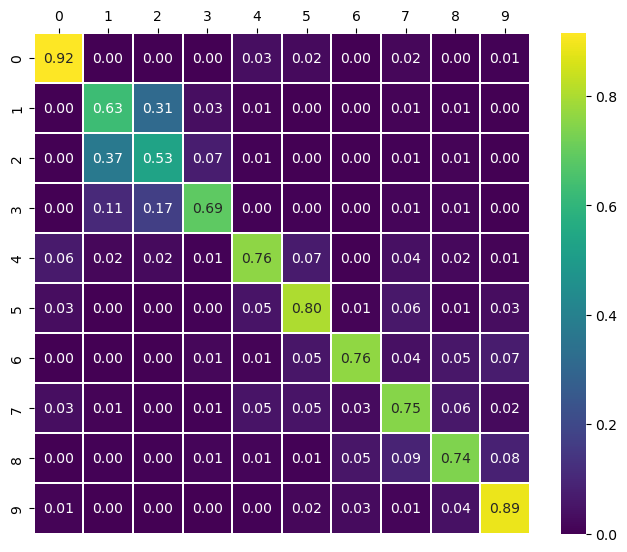

In [48]:
categories = list(range(10))

all_cfs = []
for i in range(6):
    cfs = np.array(all_results[i]["cfs"])
    all_cfs.append(cfs.mean(axis=0) / (cfs[0].sum() / 10))

cf_agg = np.array(all_cfs).mean(axis=0)

f, ax = plt.subplots(figsize=(8, 6.5))

g = sns.heatmap(
    cf_agg,
    annot=True,
    fmt=".2f",
    linewidth=0.3,
    xticklabels=categories,
    yticklabels=categories,
    cmap="viridis",
)

ax.xaxis.set_ticks_position("top")
ax.xaxis.set_label_position("top")

## Sandbox


In [35]:
data_folder = os.path.join(os.path.abspath(""), os.pardir, os.pardir, "reports", "RAW", "result_generation")
with open(os.path.join(data_folder, "arotor_replication/results_for_config_0.pkl"), "rb") as file:
    asd = joblib.load(file)

In [36]:
asd["ensemble_cfs"]

[array([[1522,  278,    0,    0,    0],
        [   4, 1796,    0,    0,    0],
        [   0,    0, 1713,   87,    0],
        [   0,    0,    2, 1798,    0],
        [   0,    0,    0,    0, 1800]]),
 array([[1790,    1,    0,    9,    0],
        [   0, 1800,    0,    0,    0],
        [   0,    0, 1793,    0,    7],
        [   0,    0,    0, 1602,  198],
        [   0,    0,   73,  461, 1266]]),
 array([[1800,    0,    0,    0,    0],
        [   0, 1800,    0,    0,    0],
        [   0,    0, 1800,    0,    0],
        [   0,   83,   46, 1657,   14],
        [   0,    0,    0,    0, 1800]])]

In [21]:
asd["cfs"]

[array([[177,   0,   0,   3,   0],
        [  0, 180,   0,   0,   0],
        [  0,   0, 158,  22,   0],
        [  0,   0,   0, 180,   0],
        [  0,   0,   0,  14, 166]])]

In [30]:
data_folder = os.path.join(os.path.abspath(""), os.pardir, os.pardir, "reports", "RAW", "result_generation")
with open(
    os.path.join(data_folder, "arotor_replication-test_2/results_for_config_0.pkl"),
    "rb",
) as file:
    asd2 = joblib.load(file)

In [31]:
asd2["ensemble_cfs"]

[array([[1513,    0,    0,  287,    0],
        [   0, 1800,    0,    0,    0],
        [   6,    0, 1364,  430,    0],
        [   2,    0,   84, 1714,    0],
        [   0,    0,    0,    0, 1800]]),
 array([[1799,    0,    0,    1,    0],
        [   0, 1800,    0,    0,    0],
        [   0,    0, 1800,    0,    0],
        [   0,    0,    0, 1539,  261],
        [   0,    0,   15,  428, 1357]])]

In [34]:
asd2["cfs_first"]

[array([[1394,    0,   74,  332,    0],
        [   0, 1800,    0,    0,    0],
        [  55,    0, 1360,  385,    0],
        [  52,    0,  107, 1641,    0],
        [   0,    0,    0,    0, 1800]]),
 array([[1800,    0,    0,    0,    0],
        [   0, 1800,    0,    0,    0],
        [   0,    0, 1800,    0,    0],
        [   0,    0,    0, 1554,  246],
        [   0,    0,   12,  431, 1357]])]